### Customer Churn Prediction Using Artificial Neural Network (ANN)


> **`Customer churn prediction`** is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use **precision**,**recall** and **f1-score** to measure performance of our model.

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the dataset

df = pd.read_csv("data/customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2654,2725-KXXWT,Male,0,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,90.75,90.75,Yes
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No
6191,8495-PRWFH,Female,1,No,No,42,Yes,Yes,DSL,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,55.65,2421.75,No
5403,0292-WEGCH,Female,0,Yes,Yes,54,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,86.20,4524.05,No
2734,2371-JUNGC,Male,0,No,No,11,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.25,208,No


### `Data Exploration (EDA)`

**First of all, drop `customerID` column as it is of no use**

In [3]:
df.drop('customerID', axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Checking the information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


**Notes:**

- The `MonthlyCharges` is of `float` type but the `TotalCharges` is of `object` type.
- So we need to transform `TotalCharges` to `float` type.

In [5]:
# Checking if there is any null values in the column "TotalCharges"

df.TotalCharges.isna().sum()

0

In [6]:
# Transforming the "TotalCharges" column as float data type 

pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [7]:
# It is showing error means there are some rows where there are blank spaces
# The errors='coerce' parameter to ignore any row where there is space between the letters

pd.to_numeric(df.TotalCharges, errors="coerce")

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [8]:
# Then the .isnull() will return a numpy array

pd.to_numeric(df.TotalCharges, errors="coerce").isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [9]:
# Let's find the rows with the blank spaces
# Now applying the above in the dataframe to let it work as index
# It will display the rows where the condition will be true

df[pd.to_numeric(df.TotalCharges, errors="coerce").isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
# Let's see how many rows have the problem

df[pd.to_numeric(df.TotalCharges, errors="coerce").isnull()].shape

(11, 20)

**Notes:**

- Here we can see the `TotalCharges` for all the above rows are blank.
- Also there are only `11` rows out of total `7043` rows so we can drop all these rows.

In [11]:
# Remove rows with space in TotalCharges
# Here we storing the new dataframe
# It shows 11 rows less than the original dataset

df1 = df[df.TotalCharges != ' ']
df.shape, df1.shape

((7043, 20), (7032, 20))

In [12]:
# Checking the datatype of the concerned column in the new dataframe

df1.TotalCharges.dtypes

dtype('O')

In [13]:
# Now again transforming the "TotalCharges" column as float data type 

df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
df1.TotalCharges.dtypes

dtype('float64')

In [14]:
# Checking the info again

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


**Notes:**

- So now we have achieved the change we wanted.

### `Data Visualization`

- Here we will do visualization on the column `tenure` as it shows how loyal the customer is.
- Here we want to see how many of the loyal customers are leaving?
- To do this we use histogram to make the plot.

In [15]:
# Checking which customers are not leaving
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [16]:
# Now checking their tenures

df1[df1.Churn=='No'].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

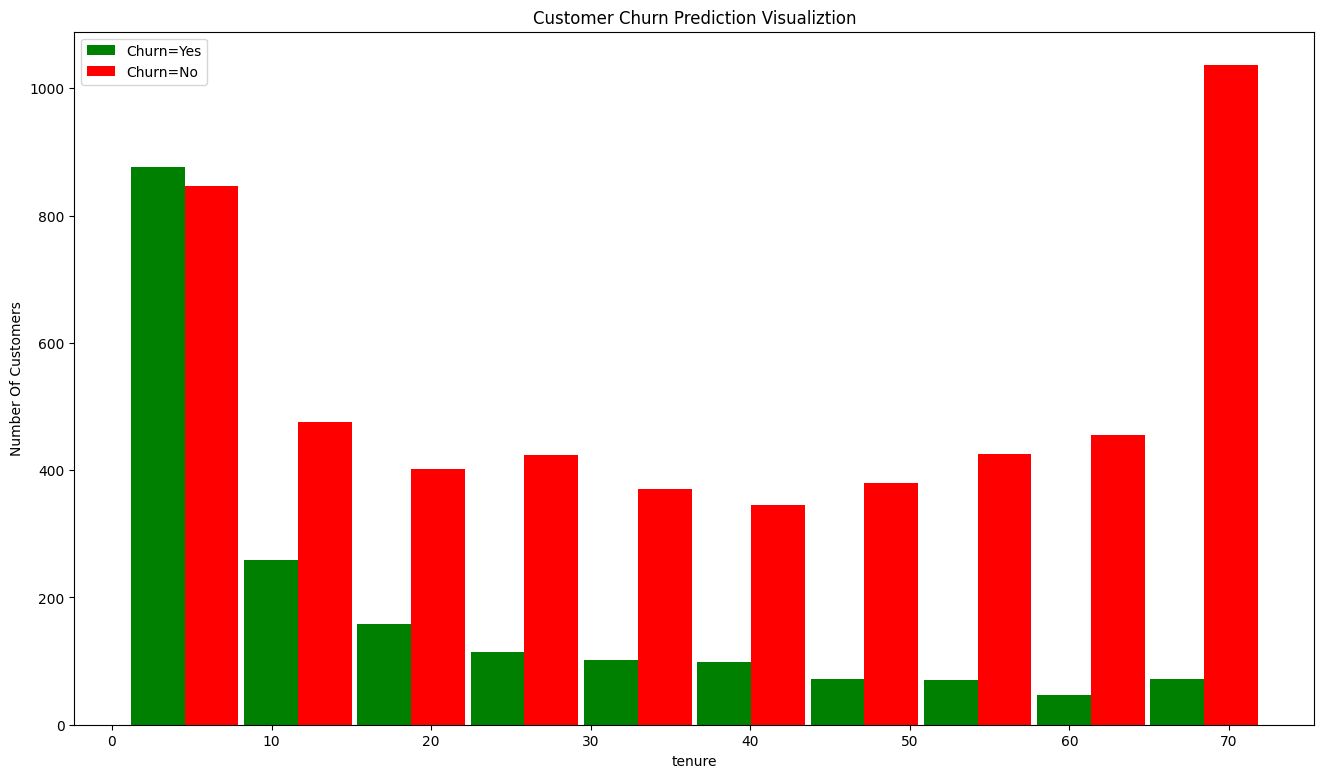

In [17]:
# Creating variables for customers who are not leaving and customers who are leaving using the above logic
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure


# Creating the plot
plt.figure(figsize=(16, 9))
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'], label=['Churn=Yes','Churn=No'])
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.legend()
plt.show()

**Notes:**

- So we can see that with increase in tenure the number of customers leaving is decreasing.

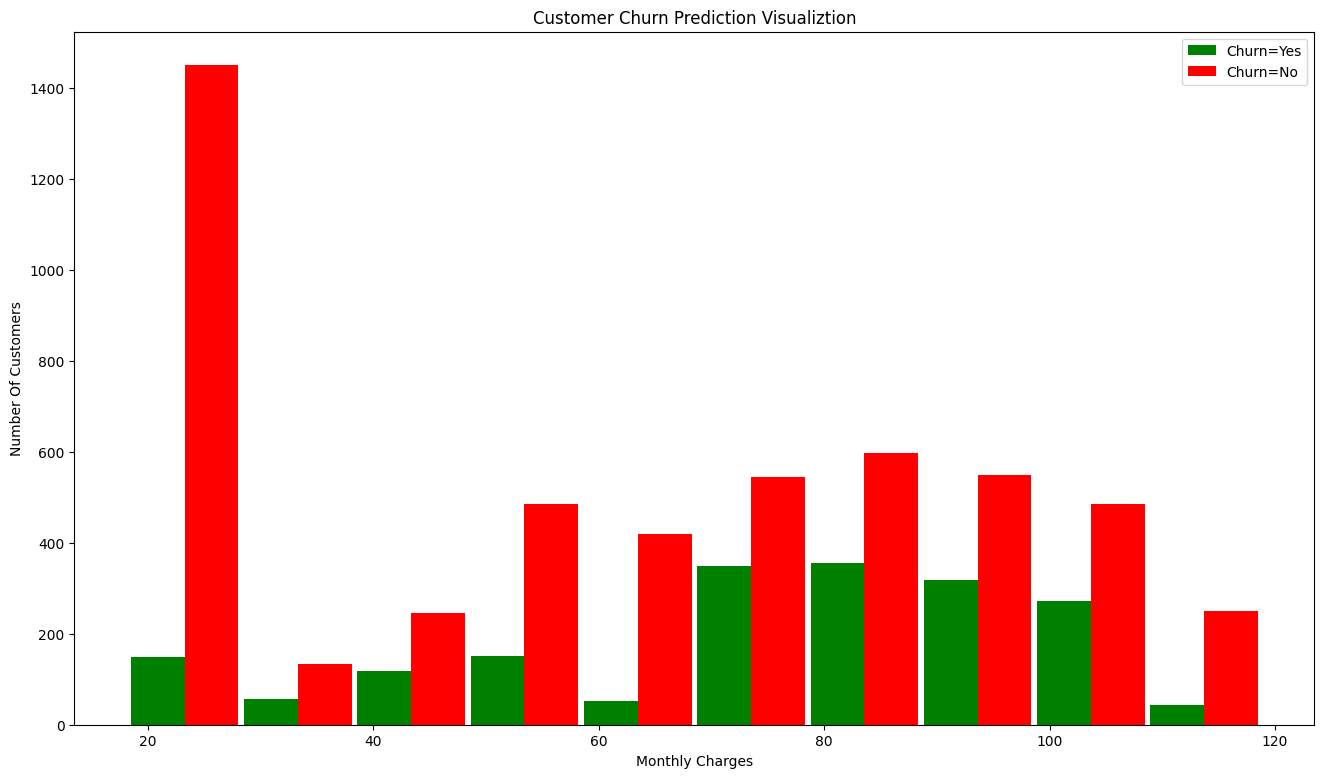

In [18]:
# Let's do the same plotting with Monthly Charges

mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.figure(figsize=(16, 9))
plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'], label=['Churn=Yes','Churn=No'])
plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.legend()
plt.show()

**Notes:**

- Here we can see customers of all kind of monthly charges are leaving. This is not good for the company.

**Many of the columns are `yes`, `no` etc. Let's print unique values in object columns to see data values**

In [19]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 
                
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Notes:**

- Some of the columns have `No internet service` or `No phone service`, that can be replaced with a simple `No`.

In [20]:
df1.replace('No internet service','No', inplace=True)
df1.replace('No phone service','No', inplace=True)

# Again checking
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Now converting `Yes` and `No` to `1` or `0`**

In [21]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0}, inplace=True)

**Also replace in the `gender` column `Female` and `Male` with `1` and `0`**

In [22]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [23]:
# Let's see the unique values again

for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


### `Data Preproceesing`

- Here we will use `Minmaxscaler` on `tenure`,`MonthlyCharges`,`TotalCharges` columns.
- Here we want the values of these columns between `0` and `1` range.

In [24]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']


scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [25]:
# Let's see the unique values again

for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: 

### Now doing train test split

In [26]:
from sklearn.model_selection import train_test_split

X = df1.drop('Churn',axis='columns')
y = df1['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

X_train.shape, X_test.shape

((5625, 19), (1407, 19))

In [27]:
X_train.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1438,1,0,0,0,0.549296,1,0,DSL,0,0,1,0,0,0,One year,1,Mailed check,0.318408,0.231335
443,1,0,0,1,0.239437,1,1,DSL,1,0,0,0,0,1,Month-to-month,0,Electronic check,0.463184,0.132460
2372,0,0,1,1,0.985915,1,1,DSL,1,1,1,1,1,1,Two year,0,Credit card (automatic),0.716915,0.723344
758,1,0,0,1,0.197183,1,0,Fiber optic,0,1,0,0,0,1,Month-to-month,1,Bank transfer (automatic),0.673134,0.144328
6766,0,0,1,1,0.183099,1,0,No,0,0,0,0,0,0,One year,0,Mailed check,0.014925,0.033528


In [28]:
y_train.head()

5664    1
101     0
2621    0
392     0
1327    1
Name: Churn, dtype: int64

**Now using `One Hot Encoding` let's code the categorical data**

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [30]:
one_hot_columns = ['InternetService','Contract','PaymentMethod']

oh_transformer = OneHotEncoder(sparse=False, drop='first')

transformer = ColumnTransformer(transformers=
                                [
                                    ("OneHotEncoder", oh_transformer, one_hot_columns)
                                ], remainder='passthrough')


# Now doing fit and transform on train and test data

X_train_tf = transformer.fit_transform(X_train)
X_test_tf = transformer.transform(X_test)

In [31]:
X_train_tf

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 6.60199005e-01, 9.77094392e-02],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.19402985e-02, 7.50057697e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 6.05472637e-01, 6.39978075e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 6.06467662e-01, 6.21174706e-01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.58706468e-02, 1.64839603e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 6.65174129e-01, 7.08123702e-01]])

In [35]:
# Creating dataframe of the training set

df3 = pd.DataFrame(X_train_tf)
df3.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.660199,0.097709
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011940,0.000075
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.605473,0.639978
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.259204,0.008135
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.808458,0.685703


In [36]:
# Checking number of columns

len(df3.columns)

23

### Now building an `ANN` model

In [33]:
import tensorflow as tf
from tensorflow import keras

In [37]:
# Here we will have 23 neurons at input layer as we have 23 features
model = keras.Sequential([
    keras.layers.Dense(23, input_shape=(23,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_tf, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 3s 2ms/step - loss: 0.4887 - accuracy: 0.7598
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4300 - accuracy: 0.7947
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4201 - accuracy: 0.8016
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8037
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.8069
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4106 - accuracy: 0.8069
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4087 - accuracy: 0.8092
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4071 - accuracy: 0.8080
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4058 - accuracy: 0.8121
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4055 - accura

In [38]:
# Evaluating the model on test data

model.evaluate(X_test_tf, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.7818


[0.4690013527870178, 0.7818052768707275]

In [39]:
# Doing predictions

yp = model.predict(X_test_tf)
yp[:5]

44/44 [==============================] - 0s 2ms/step


array([[0.22873169],
       [0.6254685 ],
       [0.03142612],
       [0.8415376 ],
       [0.6514105 ]], dtype=float32)

In [40]:
# Converting the array from 2d to 1d and change all the values to either 0 or 1
# If the value > 0.5 it is 1 else 0

y_pred = []

for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [41]:
# Doing prediction for first 10 samples

y_pred[:10]

[0, 1, 0, 1, 1, 1, 0, 0, 0, 0]

In [42]:
# Actual output for first 10 samples

y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

### Creating `Confusion Matrix`

- Here we will print the `Classification Report`.

In [43]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       999
           1       0.65      0.54      0.59       408

    accuracy                           0.78      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.77      0.78      0.78      1407



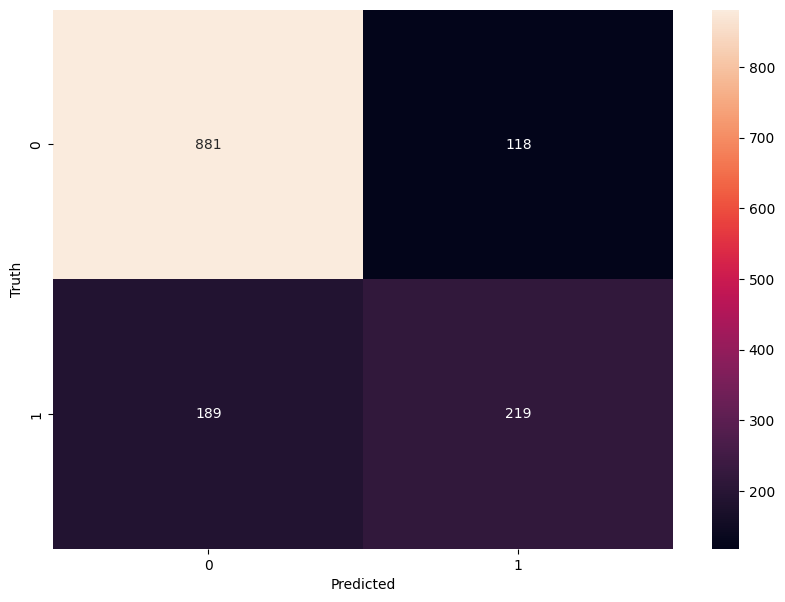

In [44]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

**Accuracy**

In [46]:
acc = round((881+219)/(881+219+118+189), 2)
print(f"Accuracy of our model is: {(acc)*100:.2f}%")

Accuracy of our model is: 78.00%


**Precision for `0` class. i.e. Precision for customers who did not churn**

In [48]:
p = round(881/(881+189), 2)
print(f"Precision of our model is: {(p)*100:.2f}%")

Precision of our model is: 82.00%


**Precision for `1` class. i.e. Precision for customers who actually churned**

In [49]:
p = round(219/(219+118), 2)
print(f"Precision of our model is: {(p)*100:.2f}%")

Precision of our model is: 65.00%


**Recall for 0 class. i.e. Recall for customers who did not churn**

In [50]:
r = round(881/(881+118), 2)
print(f"Recall of our model is: {(r)*100:.2f}%")

Recall of our model is: 88.00%


**Recall for 1 class. i.e. Recall for customers who actually churned**

In [51]:
r = round(219/(219+189), 2)
print(f"Recall of our model is: {(r)*100:.2f}%")

Recall of our model is: 54.00%


- Try to do the same with the following dataset

https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling